The project classifies and predicts sign language symbols.

The classification is done using RandomForestClassifier.

The dataset used is sign_mnist dataset from kaggle ->https://www.kaggle.com/datamunge/sign-language-mnist/data



In [2]:
# importing the needed packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


#read_dataset
data=pd.read_csv("sign_mnist_train.csv")

#viewing the dataframe
data.head()


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,156,158,160,163,165,159,166,168,170,170,171,171,171,172,171,171,170,170,169,111,121,129,135,141,144,148,151,154,157,160,...,205,206,206,207,207,206,206,204,205,204,203,202,142,151,160,172,196,188,188,190,135,96,86,77,77,79,176,205,207,207,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,157,158,156,154,154,153,152,151,149,149,148,147,146,144,142,143,138,92,108,158,159,159,159,160,160,160,160,160,160,160,...,100,78,120,157,168,107,99,121,133,97,95,120,135,116,95,79,69,86,139,173,200,185,175,198,124,118,94,140,133,84,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,186,185,185,185,184,184,184,181,181,179,179,179,178,178,109,52,66,77,83,188,189,189,188,188,189,188,188,188,188,187,...,203,204,203,201,200,200,199,198,196,195,194,193,198,166,132,114,89,74,79,77,74,78,132,188,210,209,206,205,204,203,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,211,209,207,208,207,206,203,202,201,200,198,197,195,192,197,171,51,52,54,212,213,215,215,212,212,213,212,212,211,211,...,247,242,233,231,230,229,227,225,223,221,220,216,58,51,49,50,57,60,17,15,18,17,19,1,159,255,237,239,237,236,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,186,188,189,189,190,191,189,190,190,187,190,192,193,191,191,192,192,194,194,166,169,172,174,177,180,182,185,186,187,190,...,90,77,88,117,123,127,129,134,145,152,156,179,105,106,105,104,104,104,175,199,178,152,136,130,136,150,118,92,85,76,92,105,105,108,133,163,157,163,164,179


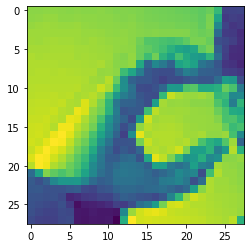

In [3]:

#sample row
a=data.iloc[3,1:].values
a=a.reshape(28,28).astype('uint8')
plt.imshow(a)


In [4]:

#storing dependent and independent variables seperately
target=data.iloc[:,0]
features=data.iloc[:,1:]

#splitting into training and testing data
train_x,test_x,train_y,test_y=train_test_split(features,target,train_size=0.8,random_state=4)

#creating a Random Forest Classifier Model

model=RandomForestClassifier(n_estimators=600)
model.fit(train_x,train_y)

"""
from sklearn.model_selection import GridSearchCV
# You can use this below code to find optimal parameter values using GridSearchCV.It takes a very long time since it has to do 1500 fits.
# i did not do it,maybe you can try  
n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 

hyperF = {'n_estimators':n_estimators, 'max_depth' : max_depth,  
              'min_samples_split' : min_samples_split, 
             'min_samples_leaf' : min_samples_leaf}

gridF = GridSearchCV(clf, hyperF, cv = 3, verbose = 1, 
                      n_jobs = -1)

#Training the model
model = gridF.fit(train_x,train_y)
"""


#Predicting the labels
pred_y=model.predict(test_x)

#Finding Accuracy Score
acc_score=accuracy_score(test_y,pred_y)
print(acc_score)


0.9972682571480604


In [7]:

#testing performance with new test data (illutrating real world scenario) 
#read data
test_data=pd.read_csv("sign_mnist_test.csv")

#spltting into features and labels
t_features=test_data.iloc[:,1:]
t_label=test_data.iloc[:,0]

#predict and find the accuracy score
final_predict=model.predict(t_features)
final_acc=accuracy_score(t_label,final_predict)
print(final_acc)

#dictionary to find the Alphabet
dict={0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X',24:'Y',25:'Z'}


0.8264082543223648


6842
the predicted letter A
0
the actual letter A


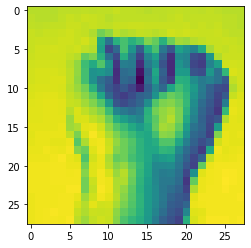

In [10]:

#viewing the results with a specific row in the dataset 
#(a row in the dataset the record of a observation-in our case,hand sign)

num=int(input()) #input a row number
b=t_features.iloc[num,:].values.reshape(1,784)
the_label=model.predict(b)

print('the predicted letter',dict[int(the_label)])
char=t_label.iloc[num]
a=t_features.iloc[num,:].values.reshape(28,28).astype('uint8')
plt.imshow(a)
print(char)
print('the actual letter',dict[char])

0.8248745119910764
785
the predicted letter T
19
the actual letter T


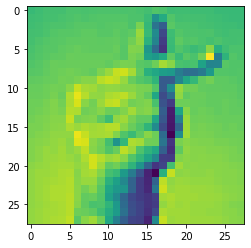

In [19]:

#testing performance with new test data (illutrating real world scenario) 
#read data
test_data=pd.read_csv("sign_mnist_test.csv")

#spltting into features and labels
t_features=test_data.iloc[:,1:]
t_label=test_data.iloc[:,0]

#predict and find the accuracy score
final_predict=model.predict(t_features)
final_acc=accuracy_score(t_label,final_predict)
print(final_acc)

#dictionary to find the Alphabet
dict={0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X',24:'Y',25:'Z'}

#viewing the results with a specific row in the dataset 
#(a row in the dataset the record of a observation-in our case,hand sign)

num=int(input()) #input a row number
b=t_features.iloc[num,:].values.reshape(1,784)
the_label=model.predict(b)

print('the predicted letter',dict[int(the_label)])
char=t_label.iloc[num]
a=t_features.iloc[num,:].values.reshape(28,28).astype('uint8')
plt.imshow(a)
print(char)
print('the actual letter',dict[char])